# Story Telling: Beanks & Pods

In [5]:
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
filename='data/BeansDataSet.csv'
try:
    data=read_csv(filename)
    print('Dataset loaded!')
except:
    print('Failed to load the dataset!')

Dataset loaded!


## Charger le fichier CSV

In [6]:
# Pic aux donnees

print(f'Head\n--------\n{data.head()}')
print(f'Tail\n--------\n{data.tail()}')
print(f'Shape\n--------\n{data.shape}')
print(f'Dasaset info\n--------')
print(f'{data.info()}')


Head
--------
  Channel Region  Robusta  Arabica  Espresso  Lungo  Latte  Cappuccino
0  Online  South    12669     9656      7561    214   2674        1338
1  Online  South     7057     9810      9568   1762   3293        1776
2  Online  South     6353     8808      7684   2405   3516        7844
3   Store  South    13265     1196      4221   6404    507        1788
4  Online  South    22615     5410      7198   3915   1777        5185
Tail
--------
    Channel Region  Robusta  Arabica  Espresso  Lungo  Latte  Cappuccino
435   Store  South    29703    12051     16027  13135    182        2204
436   Store  South    39228     1431       764   4510     93        2346
437  Online  South    14531    15488     30243    437  14841        1867
438   Store  South    10290     1981      2232   1038    168        2125
439   Store  South     2787     1698      2510     65    477          52
Shape
--------
(440, 8)
Dasaset info
--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries,

In [7]:
from pandas import set_option
set_option('display.width',100)
set_option('display.precision',3)
print(f'Descriptive Statistics\n------------------------\n{data.describe()}')
print(f'Descriptive Statistics(include all)\n------------------------\n{data.describe(include="all")}')

Descriptive Statistics
------------------------
          Robusta    Arabica   Espresso      Lungo      Latte  Cappuccino
count     440.000    440.000    440.000    440.000    440.000     440.000
mean    12000.298   5796.266   7951.277   3071.932   2881.493    1524.870
std     12647.329   7380.377   9503.163   4854.673   4767.854    2820.106
min         3.000     55.000      3.000     25.000      3.000       3.000
25%      3127.750   1533.000   2153.000    742.250    256.750     408.250
50%      8504.000   3627.000   4755.500   1526.000    816.500     965.500
75%     16933.750   7190.250  10655.750   3554.250   3922.000    1820.250
max    112151.000  73498.000  92780.000  60869.000  40827.000   47943.000
Descriptive Statistics(include all)
------------------------
       Channel Region     Robusta    Arabica   Espresso      Lungo      Latte  Cappuccino
count      440    440     440.000    440.000    440.000    440.000    440.000     440.000
unique       2      3         NaN        NaN 

## Analyse de données

In [9]:
filename='data/BeansDataSet.csv'
try:
    data=read_csv(filename, index_col=0)
    print('Dataset loaded!')
except:
    print('Failed to load the dataset!')

Dataset loaded!


In [10]:
# Pick at Data
print (f'Head\n-------\n{data.head()}')


Head
-------
        Region  Robusta  Arabica  Espresso  Lungo  Latte  Cappuccino
Channel                                                             
Online   South    12669     9656      7561    214   2674        1338
Online   South     7057     9810      9568   1762   3293        1776
Online   South     6353     8808      7684   2405   3516        7844
Store    South    13265     1196      4221   6404    507        1788
Online   South    22615     5410      7198   3915   1777        5185


In [16]:
from IPython.display import display, HTML
html_content = "<h1>Ventes par Region</h1>"
display(HTML(html_content))


In [11]:
 #Method 1
raw_data=data.copy()
region= raw_data['Region'].value_counts()
print(f'Transaction per region\n---------------------------------\n{region}')
# Method 2
raw_data=data.copy()
region= raw_data.groupby('Region').size()
print(f'\nTransaction per M2\n---------------------------------\n{region}')


Transaction per region
---------------------------------
Region
South      316
North       77
Central     47
Name: count, dtype: int64

Transaction per M2
---------------------------------
Region
Central     47
North       77
South      316
dtype: int64


In [13]:
# Records per Region  with the mean
df1= raw_data.groupby('Region').mean()
print(f'Records per Region with the mean\n---------------------------------------------\n{df1}')


# Records per Region  with the sum
df2= raw_data.groupby('Region').sum()
df2['Total']=df2.sum(axis=1)
print(f'\nRecords per Region with the sum\n---------------------------------------------\n{df2}')

Records per Region with the mean
---------------------------------------------
           Robusta   Arabica  Espresso     Lungo     Latte  Cappuccino
Region                                                                
Central   9887.681  5088.170  9218.596  4045.362  3687.468    1159.702
North    11101.727  5486.416  7403.078  3000.338  2651.117    1354.896
South    12533.472  5977.085  7896.364  2944.595  2817.753    1620.601

Records per Region with the sum
---------------------------------------------
         Robusta  Arabica  Espresso   Lungo   Latte  Cappuccino     Total
Region                                                                   
Central   464721   239144    433274  190132  173311       54506   1555088
North     854833   422454    570037  231026  204136      104327   2386813
South    3960577  1888759   2495251  930492  890410      512110  10677599


In [14]:
from IPython.display import display, HTML
html_content = "<h1>Visualiser les donnees</h1>"
display(HTML(html_content))


Mean sales per region
--------------------------


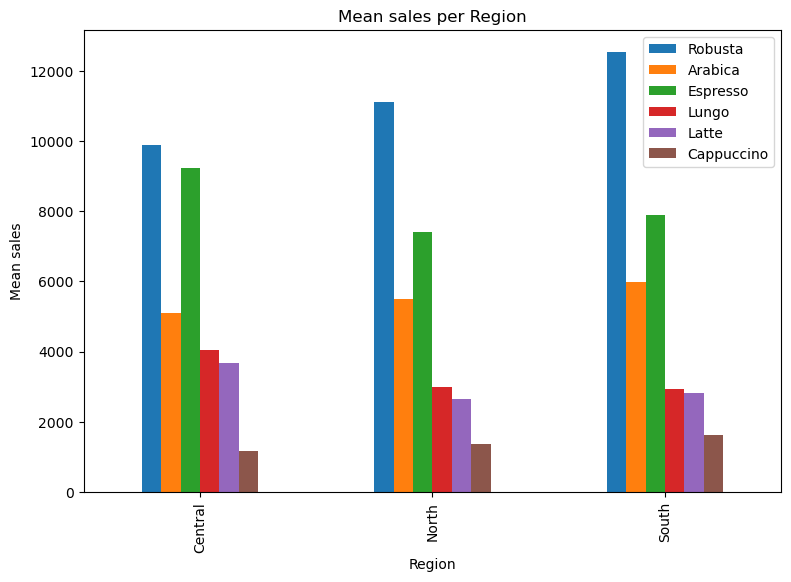

In [15]:
print(f'Mean sales per region\n--------------------------')
df1=df1.reset_index().plot(x='Region',y=['Robusta','Arabica','Espresso','Lungo','Latte','Cappuccino'],kind='bar',figsize=(9,6))
plt.title("Mean sales per Region")
plt.xlabel("Region")
plt.ylabel("Mean sales")
plt.show()


Mean sales per region
--------------------------


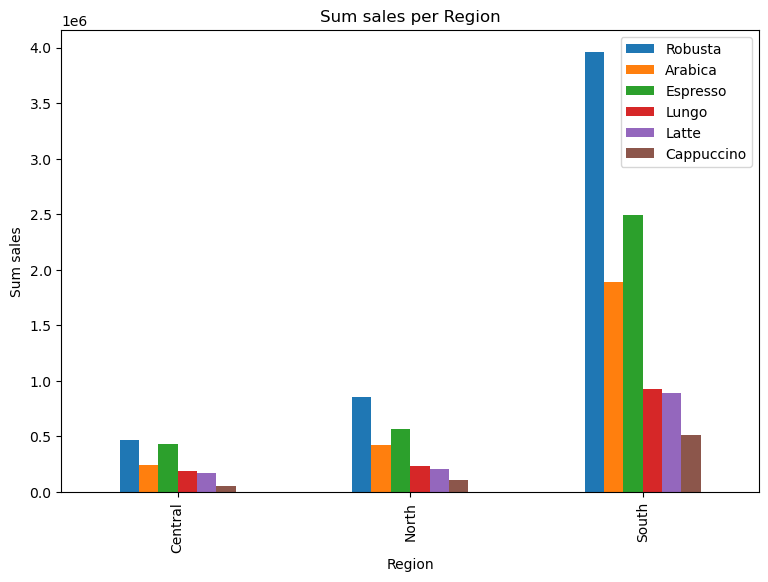

In [16]:
print(f'Mean sales per region\n--------------------------')
df2=df2.drop('Total', axis=1)
df2.reset_index().plot(x='Region',y=['Robusta','Arabica','Espresso','Lungo','Latte','Cappuccino'],kind='bar',figsize=(9,6))
plt.title("Sum sales per Region")
plt.xlabel("Region")
plt.ylabel("Sum sales")
plt.show()

In [17]:
from IPython.display import display, HTML
html_content = "<h1>Region du sud</h1>"
display(HTML(html_content))

Robusta       3960577
Espresso      2495251
Arabica       1888759
Lungo          930492
Latte          890410
Cappuccino     512110
Name: South, dtype: int64


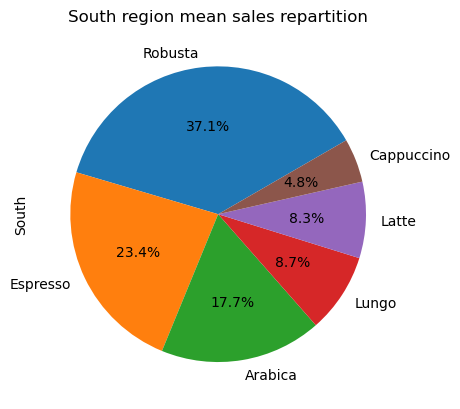

In [18]:
df_south=df2.iloc[2].sort_values(ascending=False)
print(df_south)
df_south.plot.pie(autopct='%1.1f%%',startangle=30, title="South region mean sales repartition")
plt.show()

In [19]:
from IPython.display import display, HTML
html_content = "<h1>Region du nord</h1>"
display(HTML(html_content))

Robusta       854833
Espresso      570037
Arabica       422454
Lungo         231026
Latte         204136
Cappuccino    104327
Name: North, dtype: int64


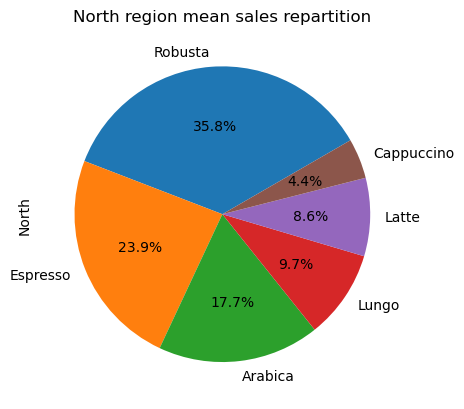

In [20]:
df_south=df2.iloc[1].sort_values(ascending=False)
print(df_south)
df_south.plot.pie(autopct='%1.1f%%',startangle=30, title="North region mean sales repartition")
plt.show()

In [21]:
from IPython.display import display, HTML
html_content = "<h1>Region du centre</h1>"
display(HTML(html_content))

Robusta       464721
Espresso      433274
Arabica       239144
Lungo         190132
Latte         173311
Cappuccino     54506
Name: Central, dtype: int64


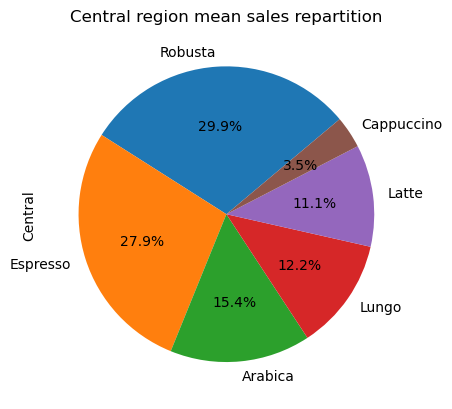

In [22]:
df_south=df2.iloc[0].sort_values(ascending=False)
print(df_south)
df_south.plot.pie(autopct='%1.1f%%',startangle=40, title="Central region mean sales repartition")
plt.show()

In [23]:
from IPython.display import display, HTML
html_content = "<h1>Vente par channel</h1>"
display(HTML(html_content))

In [28]:
print ('Mean per channel \n---------------')
df_channel=raw_data.drop('Region', axis=1)
df_channel=df_channel.groupby('Channel').agg('mean')
df_channel['Total']=df_channel.sum(axis=1)
df_channel

Mean per channel 
---------------


,Robusta,Arabica,Espresso,Lungo,Latte,Cappuccino,Total
Channel,,,,,,,
Online,8904.324,10716.500,16322.852,1652.613,7269.507,1753.437,46619.232
Store,13475.560,3451.725,3962.138,3748.252,790.560,1415.956,26844.191


In [25]:
from IPython.display import display, HTML
html_content = "<h1>Vente Store & Online</h1>"
display(HTML(html_content))

In [ ]:
print('Mean sales per Channel\n--------------------------')
# Suppression de la colonne 'Total' si elle existe
if 'Total' in df_channel.columns:
    df_channel = df_channel.drop('Total', axis=1)

# Réinitialisation de l'index et création du graphique
df_channel.reset_index().plot(x='Region', 
                              y=['Robusta', 'Arabica', 'Espresso', 'Lungo', 'Latte', 'Cappuccino'], 
                              kind='bar', figsize=(9, 6))
# Ajout du titre et des étiquettes
plt.title("Sum sales per Channel")
plt.xlabel("Region")
plt.ylabel("Sum sales")
# Affichage du graphique
plt.show()


Mean sales per Channel
--------------------------


KeyError: 'Region'